In [8]:
# Importsall
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

array([0])

In [4]:
# Parameter
theta_a = 0.5
theta_b = 0.6
theta_c = 0.8


# Given that we don't know anything about the theta
a_alpha = 1
a_beta = 1

b_alpha = 1
b_beta = 1

c_alpha = 1
c_beta = 1

In [5]:
for i in range(100):
    a_outcome = stats.beta(a_alpha, a_beta).rvs()
    b_outcome = stats.beta(b_alpha, b_beta).rvs()
    c_outcome = stats.beta(c_alpha, c_beta).rvs()
    
    outcome = {a_outcome: 'a', b_outcome: 'b', c_outcome: 'c'}
    result = max(outcome)
    
    
    if outcome[result] == 'a':
        # Update the posterior
        x = stats.binom(n = 1, p = theta_a).rvs(size = 1)
        a_alpha += x
        a_beta += 1 - x
    if outcome[result] == 'b':
        # Update the posterior
        x = stats.binom(n = 1, p = theta_b).rvs(size = 1)
        b_alpha += x
        b_beta += 1 - x
    if outcome[result] == 'c':
        # Update the posterior
        x = stats.binom(n = 1, p = theta_c).rvs(size = 1)
        c_alpha += x
        c_beta += 1 - x
        


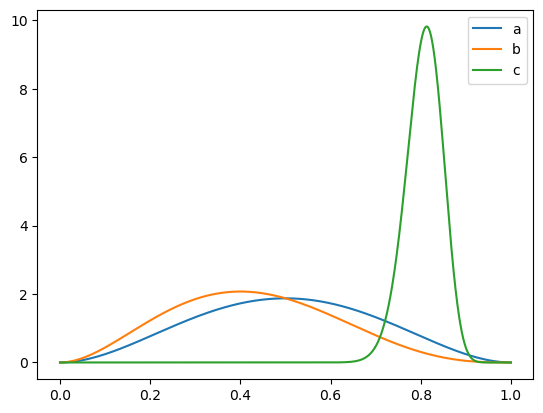

In [13]:
parameter_domain = np.linspace(0 ,1 ,1001)

a_graph = stats.beta(a_alpha, a_beta).pdf(parameter_domain)
b_graph = stats.beta(b_alpha, b_beta).pdf(parameter_domain)
c_graph = stats.beta(c_alpha, c_beta).pdf(parameter_domain)

plt.plot(parameter_domain, a_graph, label="a")
plt.plot(parameter_domain, b_graph, label="b")
plt.plot(parameter_domain, c_graph, label="c")
plt.legend()

The data in this question are the trials of the sampling of the beta distribution outcome; notice that with each iteration we inch closer to the true probability. We follow the distribution given in class in order to update our parameters, that is, on success trials we update alpha by adding x and beta by adding 1 - x. 

In the first trial, since I have no prior data on what I believe which is the better choice, I assign a beta(1, 1) to all of the choices. In each iteration of the trail I choose the outcome that has the maximum probability of winning and update my posterior. In the end, this algorithm should output the best choice (c), which was the case as demonstrated by the graph. 